### For Each Attribute: (all numeric-valued)

1. Number of times pregnant

2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test

3. Diastolic blood pressure (mm Hg)

4. Triceps skin fold thickness (mm)

5. 2-Hour serum insulin (mu U/ml)

6. Body mass index (weight in kg/(height in m)^2)

7. Diabetes pedigree function

8. Age (years)

9. Class variable (0 or 1)

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Reading the Data

In [2]:
df = pd.read_csv('Diabetes.csv', header = None)

df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Data Exploration

In [3]:
## Checking Nulls

df.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64

In [4]:
## Checking Duplicate Values

df.duplicated().sum()

0

## Univariate Analysis

### Countplot for Target

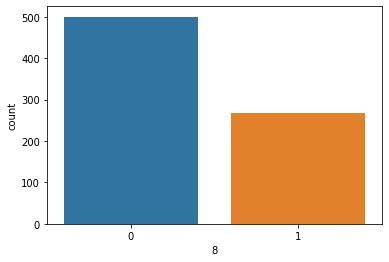

In [5]:
sns.countplot(df[8])

Class Imbalance

### Distribution Plots

Feature:  0


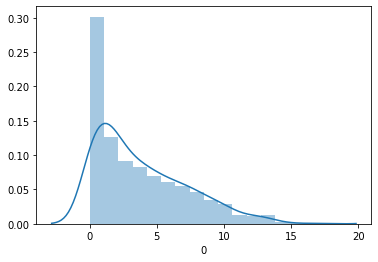

*****************************************************************************************************************************
Feature:  1


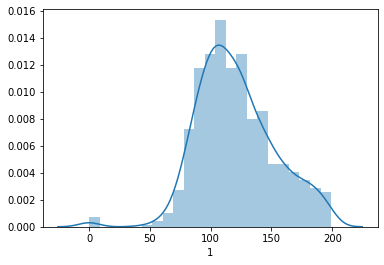

*****************************************************************************************************************************
Feature:  2


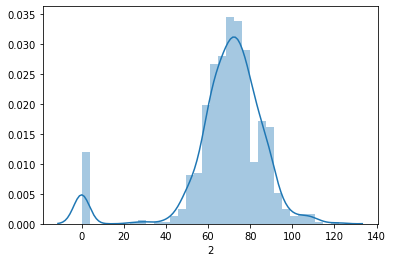

*****************************************************************************************************************************
Feature:  3


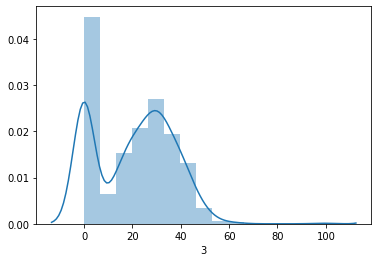

*****************************************************************************************************************************
Feature:  4


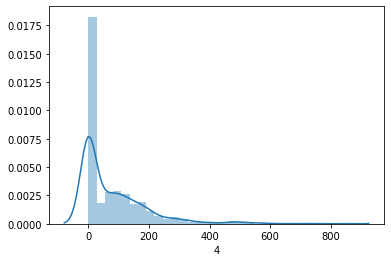

*****************************************************************************************************************************
Feature:  5


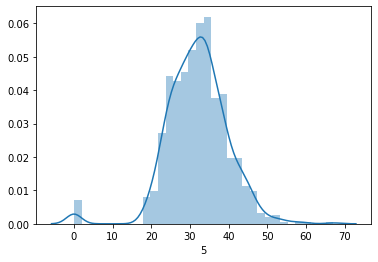

*****************************************************************************************************************************
Feature:  6


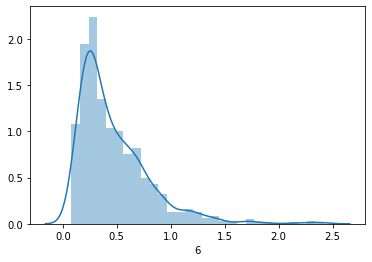

*****************************************************************************************************************************
Feature:  7


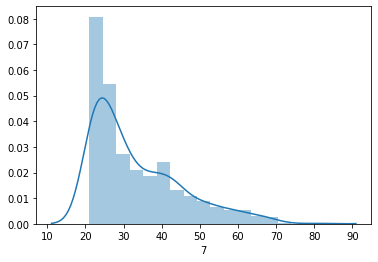

*****************************************************************************************************************************


In [6]:
for col in df.iloc[:, :-1].columns:
    print("Feature: ", col)
    sns.distplot(df[col])
    plt.show()
    print("*"*125)

### Boxplots

Feature:  0


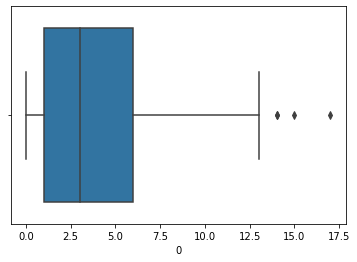

*****************************************************************************************************************************
Feature:  1


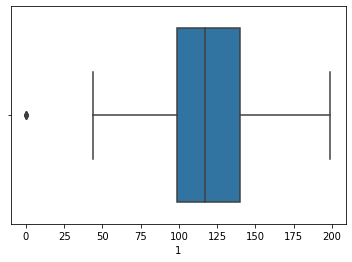

*****************************************************************************************************************************
Feature:  2


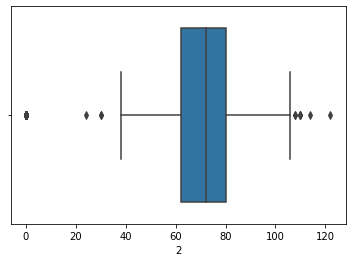

*****************************************************************************************************************************
Feature:  3


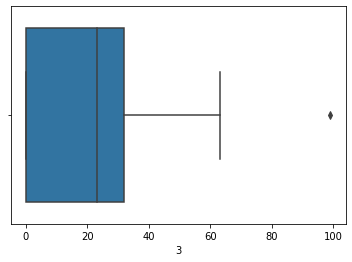

*****************************************************************************************************************************
Feature:  4


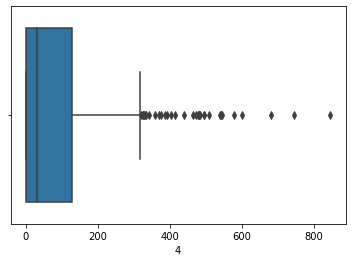

*****************************************************************************************************************************
Feature:  5


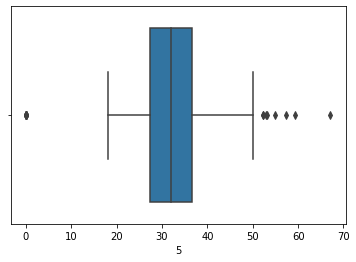

*****************************************************************************************************************************
Feature:  6


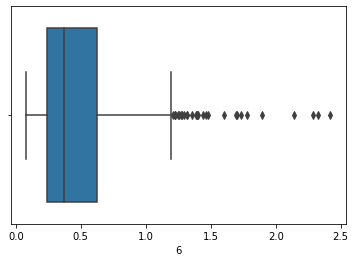

*****************************************************************************************************************************
Feature:  7


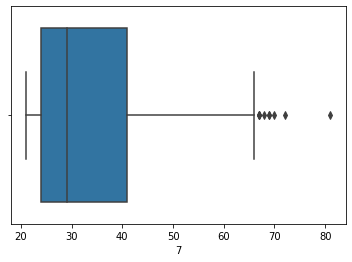

*****************************************************************************************************************************


In [7]:
for col in df.iloc[:, :-1].columns:
    print("Feature: ", col)
    sns.boxplot(df[col])
    plt.show()
    print("*"*125)

### Outlier Treatment

feature:  0 
q1: 1.0 
q3:  6.0 
iqr:  5.0 
lower_fence:  -6.5 
upper_fence:  13.5 

Total number of rows with outliers that have been treated:  4


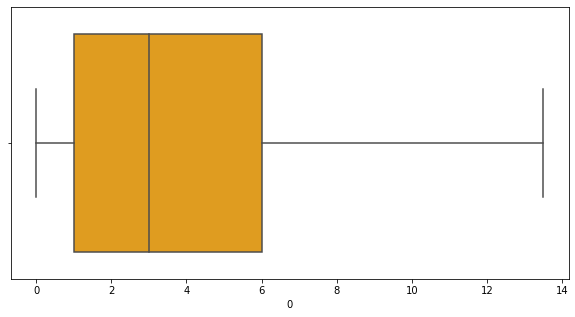

**************************************************************************************************** 


feature:  1 
q1: 99.0 
q3:  140.25 
iqr:  41.25 
lower_fence:  37.125 
upper_fence:  202.125 

Total number of rows with outliers that have been treated:  5


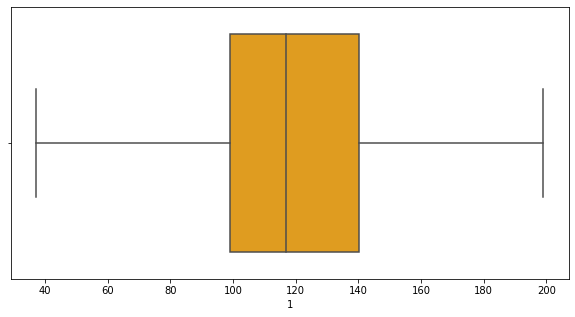

**************************************************************************************************** 


feature:  2 
q1: 62.0 
q3:  80.0 
iqr:  18.0 
lower_fence:  35.0 
upper_fence:  107.0 

Total number of rows with outliers that have been treated:  45


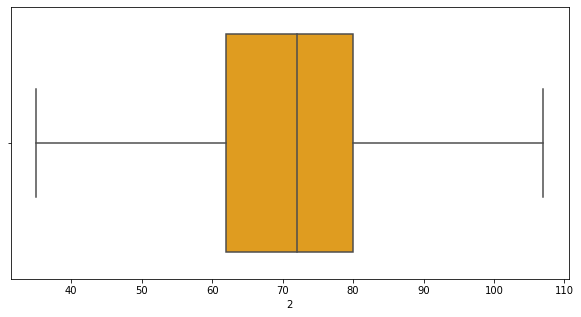

**************************************************************************************************** 


feature:  3 
q1: 0.0 
q3:  32.0 
iqr:  32.0 
lower_fence:  -48.0 
upper_fence:  80.0 

Total number of rows with outliers that have been treated:  1


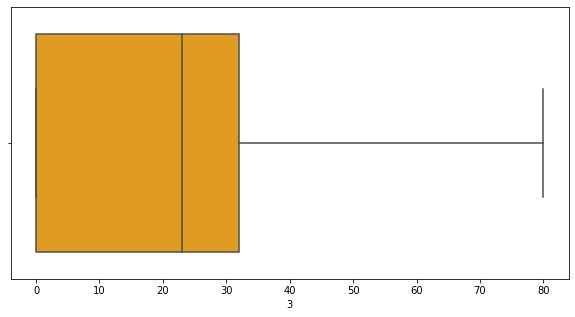

**************************************************************************************************** 


feature:  4 
q1: 0.0 
q3:  127.25 
iqr:  127.25 
lower_fence:  -190.875 
upper_fence:  318.125 

Total number of rows with outliers that have been treated:  34


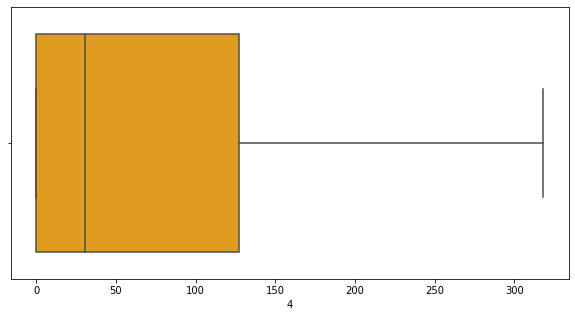

**************************************************************************************************** 


feature:  5 
q1: 27.3 
q3:  36.6 
iqr:  9.3 
lower_fence:  13.35 
upper_fence:  50.550000000000004 

Total number of rows with outliers that have been treated:  19


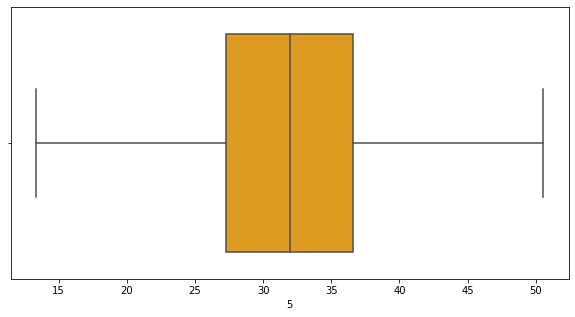

**************************************************************************************************** 


feature:  6 
q1: 0.24375 
q3:  0.62625 
iqr:  0.38249999999999995 
lower_fence:  -0.32999999999999996 
upper_fence:  1.2 

Total number of rows with outliers that have been treated:  29


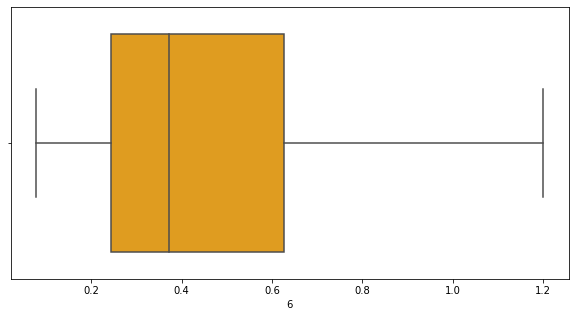

**************************************************************************************************** 


feature:  7 
q1: 24.0 
q3:  41.0 
iqr:  17.0 
lower_fence:  -1.5 
upper_fence:  66.5 

Total number of rows with outliers that have been treated:  9


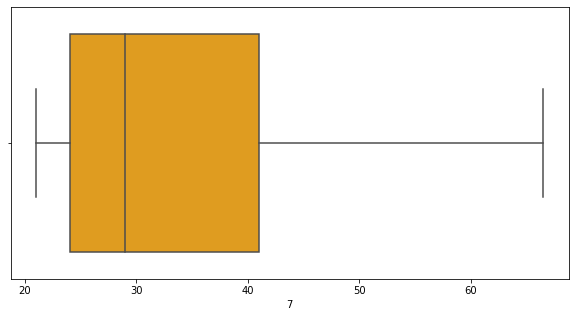

**************************************************************************************************** 




In [8]:
for col in df.iloc[:,:-1].columns:
    if df[col].dtype != object:
        
        ## Finding Interquartile range and printing its values        
        q1, q3 = np.percentile(df[col], [25,75])
        iqr = q3-q1
        lower_fence = q1-(1.5 * iqr)
        upper_fence = q3+(1.5 * iqr)
        
        
        
        ### Printing the range of optimal values
        print("feature: ", col, '\nq1:', q1,'\nq3: ', q3, '\niqr: ', iqr, '\nlower_fence: ', lower_fence, '\nupper_fence: ', upper_fence, '\n')
        
        
        ## Printing the total number of rows with outliers
        a = len(df[df[col] > upper_fence])
        b = len(df[df[col] < lower_fence])
        print("Total number of rows with outliers that have been treated: ", (a+b))
        
        
        ### Replacing the values above upper fence and lower fence i.e. outliers with optimal range 
        df[col] = df[col].apply(lambda x: upper_fence if x > upper_fence else lower_fence if x< lower_fence else x)
        
    
        ### Creating boxplots to ensure that there are no outliers
        fig = plt.figure(figsize =(10,5))
        sns.boxplot(x = df[col], data= df, color='orange', orient='h')
        plt.show()
        print('*'*100, '\n'*2)

## Bivariate Analysis

### Barcharts

Relationship of Target with:  0


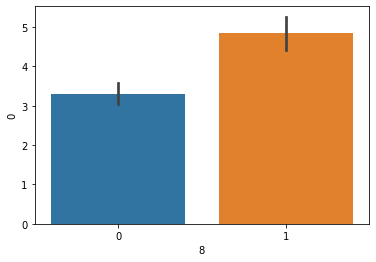

*****************************************************************************************************************************
Relationship of Target with:  1


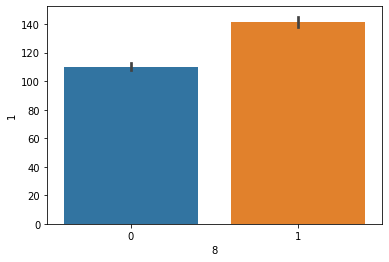

*****************************************************************************************************************************
Relationship of Target with:  2


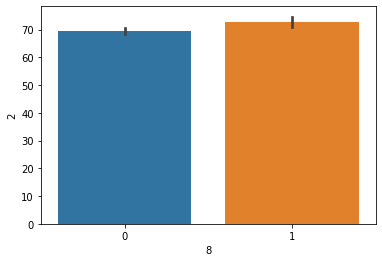

*****************************************************************************************************************************
Relationship of Target with:  3


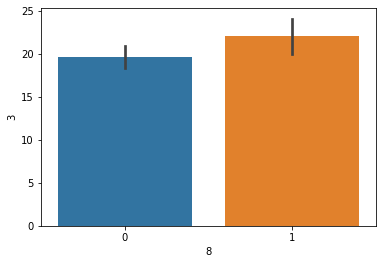

*****************************************************************************************************************************
Relationship of Target with:  4


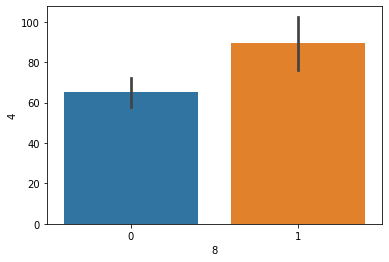

*****************************************************************************************************************************
Relationship of Target with:  5


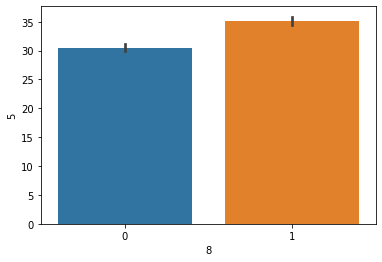

*****************************************************************************************************************************
Relationship of Target with:  6


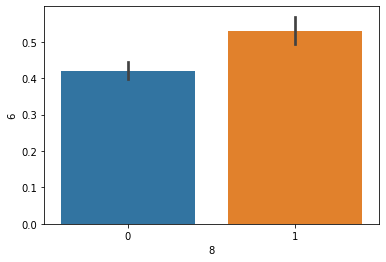

*****************************************************************************************************************************
Relationship of Target with:  7


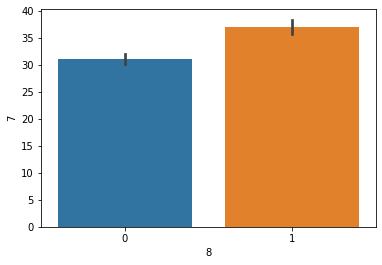

*****************************************************************************************************************************
Relationship of Target with:  8


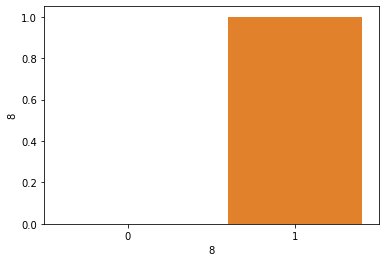

*****************************************************************************************************************************


In [9]:
for col in df.columns:
    print("Relationship of Target with: ", col)
    sns.barplot(x = df[8], y = df[col])
    plt.show()
    print("*"*125)

### Checking Correlation with Target

In [10]:
df.corr()

,0,1,2,3,4,5,6,7,8
0,1.000000,0.128987,0.184307,-0.084349,-0.077793,0.024681,-0.017398,0.549695,0.220392
1,0.128987,1.000000,0.197865,0.059806,0.315856,0.235542,0.120213,0.269056,0.479158
2,0.184307,0.197865,1.000000,0.152644,0.050080,0.282544,0.038793,0.304208,0.113301
3,-0.084349,0.059806,0.152644,1.000000,0.488101,0.401494,0.177920,-0.119170,0.073125
4,-0.077793,0.315856,0.050080,0.488101,1.000000,0.209665,0.190087,-0.065547,0.124721
5,0.024681,0.235542,0.282544,0.401494,0.209665,1.000000,0.141087,0.043375,0.309739
6,-0.017398,0.120213,0.038793,0.177920,0.190087,0.141087,1.000000,0.047289,0.184969
7,0.549695,0.269056,0.304208,-0.119170,-0.065547,0.043375,0.047289,1.000000,0.242702
8,0.220392,0.479158,0.113301,0.073125,0.124721,0.309739,0.184969,0.242702,1.000000


All the features have low correlation with target and with each other also

### Scatter plots of various Features

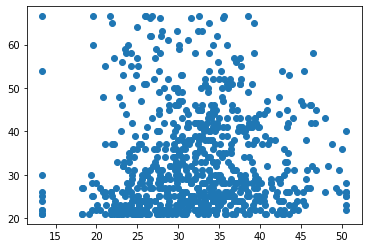

In [11]:
# bmi and age

plt.scatter(x = df[5],y = df[7])

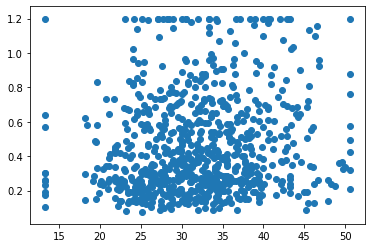

In [12]:
## bmi and diabetes

plt.scatter(x = df[5],y = df[6])

There is not a strong correlation

## Preprocessing

In [13]:
## Separating Features and Target

X = df.drop(8, 1)
y = df[8]

display(X.head(),
       y.head())

,0,1,2,3,4,5,6,7
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0


0    1
1    0
2    1
3    0
4    1
Name: 8, dtype: int64

In [15]:
## Converting target column to array

X = X.to_numpy()
y = y.to_numpy()

display(X,y)

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [16]:
## Splitting the data into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size =0.2)

## Model Making

In [17]:
from keras.models import Sequential

from keras.layers import Dense

In [18]:
model = Sequential()

model.add(Dense(12, input_dim=8, activation='relu'))

model.add(Dense(8, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

In [19]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
model.fit(X_train, y_train, epochs=150, batch_size=10)

Epoch 1/150
62/62 [==============================] - 0s 1ms/step - loss: 9.3626 - accuracy: 0.4756
Epoch 2/150
62/62 [==============================] - 0s 973us/step - loss: 1.8397 - accuracy: 0.6107
Epoch 3/150
62/62 [==============================] - 0s 1ms/step - loss: 1.2190 - accuracy: 0.5619
Epoch 4/150
62/62 [==============================] - 0s 2ms/step - loss: 0.9961 - accuracy: 0.6075
Epoch 5/150
62/62 [==============================] - 0s 1ms/step - loss: 0.8728 - accuracy: 0.6075
Epoch 6/150
62/62 [==============================] - 0s 1ms/step - loss: 0.7974 - accuracy: 0.6547
Epoch 7/150
62/62 [==============================] - 0s 1ms/step - loss: 0.7739 - accuracy: 0.6352
Epoch 8/150
62/62 [==============================] - 0s 1ms/step - loss: 0.7380 - accuracy: 0.6612
Epoch 9/150
62/62 [==============================] - 0s 1ms/step - loss: 0.7140 - accuracy: 0.6596
Epoch 10/150
62/62 [==============================] - 0s 1ms/step - loss: 0.6926 - accuracy: 0.6564
Epoch 1

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                108       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [22]:
params = model.evaluate(X_train , y_train)

params

20/20 [==============================] - 0s 1ms/step - loss: 0.4929 - accuracy: 0.7769


[0.49286341667175293, 0.776872992515564]

1st is the loss value/ function (cross_entorpy) and 

2nd is the accuracy

In [23]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(8, 12) dtype=float32, numpy=
 array([[ 0.07027947,  0.18065596, -0.42584455, -0.04803732,  0.09149861,
         -0.5382353 ,  0.02676201,  1.2766728 , -0.37044287,  0.5221433 ,
          0.50832665,  0.5843954 ],
        [ 0.13659224, -0.34942612, -0.02009021,  0.28909156,  0.11417607,
         -0.16364276, -0.2926456 , -0.45938706, -0.32982355,  0.40002993,
         -0.06876519, -0.3507292 ],
        [-0.02903842, -0.2831186 ,  0.49388403, -0.3264714 ,  0.11696211,
          0.4396981 , -0.25648677,  0.48553455, -0.26640525,  0.4601548 ,
          0.51163965,  0.07677116],
        [ 0.12714203, -0.47021055, -0.31843117, -0.18964466,  0.39542848,
         -0.40085974, -0.23701087, -0.66948813,  0.23134992, -0.19845007,
         -0.29833576,  0.35226798],
        [ 0.07218184, -0.394418  ,  0.27260295,  0.44851723, -0.3280601 ,
          0.08446518, -0.09387526, -0.05405056,  0.23094493,  0.11837815,
          0.2420886 ,  0.18822001],
        [-0.1

In [24]:
y_pred = model.predict(X_test)

y_pred[:15]

array([[0.16259381],
       [0.18456075],
       [0.6135073 ],
       [0.09059834],
       [0.4142722 ],
       [0.7637322 ],
       [0.8309355 ],
       [0.1211766 ],
       [0.85400355],
       [0.35368815],
       [0.12553021],
       [0.8598612 ],
       [0.73610145],
       [0.31447363],
       [0.803121  ]], dtype=float32)

In [25]:
y_pred = model.predict_classes(X_test)

y_pred[:15]

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([[0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1]])

In [26]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

## Checking reports

print('Accuracy_score Testing Data: ',round(accuracy_score(y_test, y_pred)*100,2))

print('\n','Classification_report Testing data: ','\n','\n',classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
cm

Accuracy_score Testing Data:  74.03

 Classification_report Testing data:  
 
               precision    recall  f1-score   support

           0       0.83      0.76      0.79       101
           1       0.61      0.70      0.65        53

    accuracy                           0.74       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.74      0.74       154



array([[77, 24],
       [16, 37]], dtype=int64)

### Train Accuarcy = 77.69 and Test Accuracy = 74.03. So neither undefitting nor overfitting